In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, auc


from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.neural_network import MLPClassifier

In [2]:
df = pd.read_csv("processed.csv")
pd.set_option("display.max_columns", None)
df


,Rainfall,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow
0,0.6,8.3,44.0,71.0,22.0,1007.7,1007.1,8.0,0.0,0,0
1,0.0,10.0,44.0,44.0,25.0,1010.6,1007.8,7.0,1.0,0,0
2,0.0,4.4,46.0,38.0,30.0,1007.6,1008.7,8.0,2.0,0,0
3,0.0,8.9,24.0,45.0,16.0,1017.6,1012.8,0.0,5.0,0,0
4,1.0,3.0,41.0,82.0,33.0,1010.8,1006.0,7.0,8.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
145455,0.0,7.8,31.0,51.0,24.0,1024.6,1020.3,1.0,1.0,0,0
145456,0.0,13.5,22.0,56.0,21.0,1023.5,1019.1,8.0,5.0,0,0
145457,0.0,11.0,37.0,53.0,24.0,1021.0,1016.8,8.0,1.0,0,0
145458,0.0,13.2,28.0,51.0,24.0,1019.4,1016.5,3.0,2.0,0,0


In [3]:
df = df.dropna()

# Extract features and target variable
X = df.drop("RainTomorrow", axis=1)
y = df["RainTomorrow"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a simple feedforward neural network
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print("Binary Crossentropy Loss on Test Set:", loss)
print("Accuracy on Test Set:", accuracy)

# Make predictions for binary classification
predictions = (model.predict(X_test_scaled) > 0.5).astype('int32')

# Evaluate the performance for binary classification
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

# Print the results for binary classification
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)


Epoch 1/50
3637/3637 [==============================] - 3s 683us/step - loss: 0.3696 - accuracy: 0.8401 - val_loss: 0.3639 - val_accuracy: 0.8410
Epoch 2/50
3637/3637 [==============================] - 2s 650us/step - loss: 0.3613 - accuracy: 0.8437 - val_loss: 0.3649 - val_accuracy: 0.8417
Epoch 3/50
3637/3637 [==============================] - 2s 649us/step - loss: 0.3595 - accuracy: 0.8449 - val_loss: 0.3618 - val_accuracy: 0.8418
Epoch 4/50
3637/3637 [==============================] - 2s 648us/step - loss: 0.3585 - accuracy: 0.8447 - val_loss: 0.3631 - val_accuracy: 0.8418
Epoch 5/50
3637/3637 [==============================] - 2s 681us/step - loss: 0.3580 - accuracy: 0.8456 - val_loss: 0.3616 - val_accuracy: 0.8422
Epoch 6/50
3637/3637 [==============================] - 3s 885us/step - loss: 0.3570 - accuracy: 0.8461 - val_loss: 0.3601 - val_accuracy: 0.8427
Epoch 7/50
3637/3637 [==============================] - 3s 744us/step - loss: 0.3567 - accuracy: 0.8460 - val_loss: 0.3597 -

910/910 [==============================] - 0s 388us/step
ROC-AUC Score: 0.8611489194680965


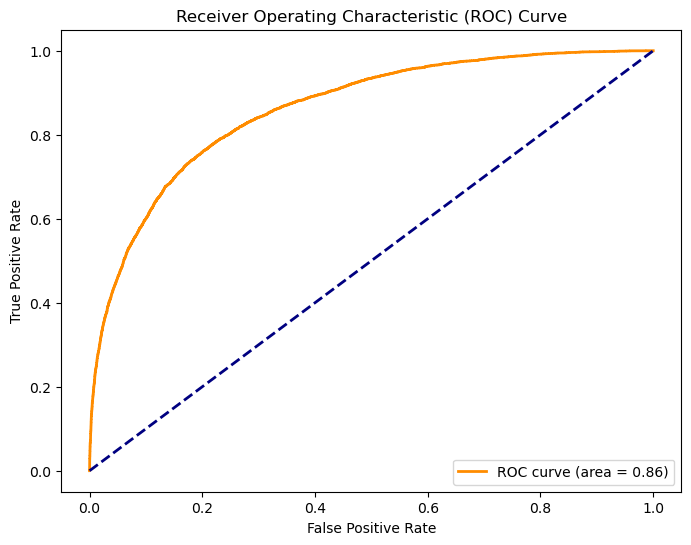

In [4]:

# Predict probabilities instead of binary outcomes for ROC-AUC calculation
probabilities = model.predict(X_test_scaled)

# Extract the probabilities for the positive class
positive_class_probabilities = probabilities[:, 0]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, positive_class_probabilities)
roc_auc = auc(fpr, tpr)

# Print ROC-AUC score
print("ROC-AUC Score:", roc_auc)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
